## Clustering Features

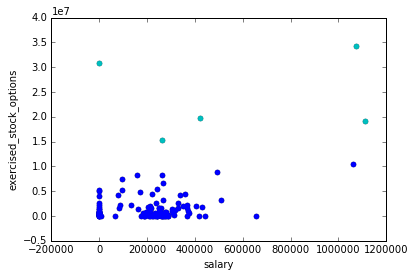

In [1]:
import sys
sys.path.append("C:/Users/Jeff/udacity/Intro_to_Machine_Learning/ud120-projects/tools/")
sys.path.append('C:/Users/Jeff/udacity/Intro_to_Machine_Learning/ud120-projects/choose_your_own')
sys.path.append('C:/Users/Jeff/udacity/Intro_to_Machine_Learning/ud120-projects/datasets_questions')

import os
os.chdir('C:/Users/Jeff/udacity/Intro_to_Machine_Learning/ud120-projects/outliers')


import pickle
import numpy
import matplotlib.pyplot as plt
from feature_format import featureFormat, targetFeatureSplit

%matplotlib inline



def Draw(pred, features, poi, mark_poi=True, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)



### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)


# the features to be used
features_list = ['poi', 'salary', 'exercised_stock_options']

def finance_kmeans(data_dict, features_list):
    data = featureFormat(data_dict, features_list )
    poi, finance_features = targetFeatureSplit( data )

    # plot the first 2 features
    for f in finance_features:
        plt.scatter( f[0], f[1] )

    # k-means clustering
    from sklearn.cluster import KMeans
    clf = KMeans(2)
    clf.fit(finance_features)
    pred = clf.predict(finance_features)

    # show the clustering
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=features_list[1], f2_name=features_list[2])
    
    return None
    

finance_kmeans(data_dict, features_list)

## Clustering with 3 Features

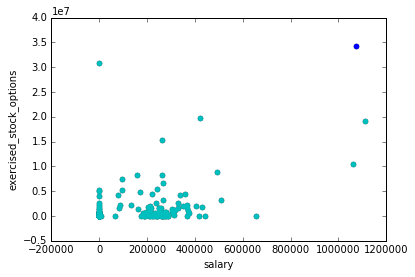

In [2]:
features_list = ['poi', 'salary', 'exercised_stock_options', 'total_payments']

finance_kmeans(data_dict, features_list)

## Stock Option Range

In [3]:
import pandas as pd

df = pd.DataFrame(data_dict)
df.loc['exercised_stock_options',:] = pd.to_numeric(df.loc['exercised_stock_options',:], errors='coerce')
print df.loc['exercised_stock_options',:].max(skipna=True)
print df.loc['exercised_stock_options',:].min(skipna=True)

34348384.0
3285.0


## Salary Range

In [4]:
df.loc['salary',:] = pd.to_numeric(df.loc['salary',:], errors='coerce')
print df.loc['salary',:].max(skipna=True)
print df.loc['salary',:].min(skipna=True)

1111258.0
477.0
